In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Hi-Fish Screen data anslysis (cont.)
# exam consistency among C5, C6 and the average C
# select stable clusters

In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

## Import Data

In [2]:
print('Read files:\n','Plate 1 map.csv\n','Plate 2 map.csv\n',
      'Summary_well_data_5P1C5.csv\n','Summary_well_data_5P1C6.csv\n',
      'Summary_well_data_5P2C6.csv\n','Summary_well_data_5P2C6.csv\n')
map1 = pd.read_csv('Plate 1 map.csv')
map2 = pd.read_csv('Plate 2 map.csv')
P1C5 = pd.read_csv('Summary_well_data_5P1C5.csv')
P1C6 = pd.read_csv('Summary_well_data_5P1C6.csv').iloc[:,1:]
P2C5 = pd.read_csv('Summary_well_data_5P2C5.csv').iloc[:,:-1]
P2C6 = pd.read_csv('Summary_well_data_5P2C6.csv').iloc[:,:-1]

p1c5 = pd.merge(map1[map1['Type'] == 'Amp'].iloc[:,[2,8]], P1C5, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p1c6 = pd.merge(map1[map1['Type'] == 'Amp'].iloc[:,[2,8]], P1C6, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p2c5 = pd.merge(map2[map2['Type'] == 'Amp'].iloc[:,[2,8]], P2C5, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p2c6 = pd.merge(map2[map2['Type'] == 'Amp'].iloc[:,[2,8]], P2C6, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
c5 = p1c5.append(p2c5)
c6 = p1c6.append(p2c6)
C = (c5 + c6)/ 2.

#drop columns which end by '_cnt','_norm' or start with 'Max_','Min_'
to_drop = []
for col in C.columns:
    if col[-3:]=='cnt' or col[-4:]=='norm':
        to_drop.append(col)
    elif col[:3]=='Max' or col[:3]=='Min':
        to_drop.append(col)
to_use = list(set(C.columns) - set(to_drop))
Cc = C[to_use]
Cc5 = c5[to_use]
Cc6 = c6[to_use]

print('{} features to use, {} features dropped.'.format(len(to_use), len(to_drop)))
#print('{} features to use:\n\n{}\n\n{} features dropped:\n\n{}'.format(len(to_use), to_use, len(to_drop),to_drop))

#replace gene names
Genes = C.index.tolist()
His2B = 'His2B:CG33870 | His2B:CG33868 | His2B:CG33882 | His2B:CG33894 | His2B:CG33876 | His2B:CG33892 | His2B:CG33910 | His2B:CG33898 | His2B:CG33872 | His2B:CG33908 | His2B:CG33888 | His2B:CG33902 | His2B:CG33890 | His2B:CG33886 | His2B:CG33874 | His2B:CG33884 | His2B:CG33878 | His2B:CG17949 | His2B:CG33906 | His2B:CG33904 | His2B:CG33900 | His2B:CG33880 | His2B:CG33896 '
His3 = 'His3:CG33818 | His3:CG33815 | His3:CG33857 | His3:CG33833 | His3:CG33839 | His3:CG33806 | His3:CG33866 | His3:CG33863 | His-Psi:CR31754 | His3:CG33842 | His3:CG33827 | His3:CG33812 | His3:CG33860 | His3:CG33824 | His3:CG31613 | His3:CG33809 | His3:CG33848 | His3:CG33845 | His3:CG33821 | His3:CG33851 | His3:CG33830 | His3:CG33836 | His3:CG33803 | His3:CG33854 '
Hsp = 'Hsp70Bb | Hsp70Ba | Hsp70Bc | Hsp70Bbb '
#print(Gene.index(His),Gene.index(Hsp))
Genes[Genes.index(His2B)] = 'His2B:CG+'
Genes[Genes.index(His3)] = 'His3:CG+'
Genes[Genes.index(Hsp)] = 'Hsp70B+'
#Replace multiplicated names
Repeats = set([x for x in Genes if Genes.count(x) >1])
print('{} genes have repeats.'.format(len(Repeats)))
#print('\n{} genes have repeats:\n\n {}'.format(len(Repeats), Repeats))
for i in [1,2,3]:
    for r in list(Repeats):
        if r in Genes:
            Genes[Genes.index(r)] = r + '_' + str(i)
Cc.index = Genes
Cc5.index = Genes
Cc6.index = Genes
#print(len(Genes),Genes[375])

C10 = pd.read_csv('C10.csv')
#C10 = C10[['Genes', 'spcl_laplacian','k-mean', 'ward_connection', 'spcl_nneighbors']]
#C10.drop(['ward','spcl_rbf', 'birch'], axis=1, inplace= True)

Read files:
 Plate 1 map.csv
 Plate 2 map.csv
 Summary_well_data_5P1C5.csv
 Summary_well_data_5P1C6.csv
 Summary_well_data_5P2C6.csv
 Summary_well_data_5P2C6.csv

29 features to use, 46 features dropped.
61 genes have repeats.


In [8]:
C10['Genes'] = Genes
C10labels=C10.set_index('Genes')
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate the distance between each sample
Z10= linkage(C10labels, 'complete', metric='Hamming') # Hamming distance
plt.figure(figsize=(10,90))
dendrogram(
    Z10,
    orientation="left",
    labels=C.index,
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    color_threshold=0.5, 
    above_threshold_color='grey'
)
plt.xlabel('distance')
plt.xlim(1.1,-0.1)
plt.savefig("Hamming_distance.pdf")
plt.close()

C10labels.head()

,k-mean,ward,ward_connection,spcl_nneighbors,spcl_laplacian,spcl_rbf,birch
Genes,,,,,,,
eIF2B-delta _1,5,12,13,0,0,0,12
CG3817 _1,11,1,1,11,10,7,1
CycC,4,4,4,4,13,10,5
CG4673 _1,0,12,1,0,2,16,12
CG13482 _1,4,4,4,10,13,10,5


## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
C_normalized = scaler.fit(Cc).transform(Cc)  # type numpy array
C_normalized5 = scaler.fit(Cc5).transform(Cc5)
C_normalized6 = scaler.fit(Cc6).transform(Cc6)

## PCA

In [7]:
## PCA
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95).fit(C_normalized) # preserve 95% variance
c_pca = pca.transform(C_normalized) # numpy array

c_pca5 = PCA(n_components = 0.95).fit(C_normalized5).transform(C_normalized5)
c_pca6 = PCA(n_components = 0.95).fit(C_normalized6).transform(C_normalized6)

#pca.n_components_ 
print('PCA reduces data size from {} to {} and preserves 95% of variance'
      .format(C_normalized.shape,c_pca6.shape))

PCA reduces data size from (424, 29) to (424, 11) and preserves 95% of variance


## Build my visualizer

In [52]:
#Plotting PCA2D
def myPCAmap(pcaarray,labellist=[],ylim=(-14,14),whichplate=None):

    plt.figure(figsize=(12,9))
    plt.scatter(pcaarray[:,0], pcaarray[:,1], s=40, c= 'grey', alpha=0.3)   
    
    pca=pd.DataFrame(pcaarray[:,0:2],columns=('PC1','PC2'))
    pca['txt']=Genes
    df = pca.loc[pca['txt'].isin(labellist)]
    
    for txt, x, y in zip(df['txt'].tolist(), df['PC1'].tolist(), df['PC2'].tolist()):
        plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.05),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.ylim(ylim)
    plt.xlim(-11,30)
    plt.title('\'Undistorted\' mapping of genes ({})\n'.format(whichplate), fontsize='large')
#plt.savefig('PCA mapping.pdf')
    plt.show()
    plt.close()
    return

In [8]:
#t-SNE plot
#http://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

#plt.scatter(C_kmean2d['PC1'], C_kmean2d['PC2'], c= C_kmean2d['Label'], cmap='tab20', alpha=0.5)
#print(cm)
#cm.colors[19]
st = time.time()
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=150.0,n_iter=1500,random_state = 0)
c_tsne_plot = tsne.fit_transform(C_normalized)
C_tsne_plot= pd.DataFrame(c_tsne_plot, index=C.index, columns=('TC1','TC2'))
C_tsne_plot['txt'] = Genes
elapsed_time = time.time() - st
#print('time: {0:.5f}s\n'.format(elapsed_time))

In [61]:
#<matplotlib.colors.ListedColormap object at 0x1133ab6d8>
#https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html

# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cm = plt.cm.get_cmap('tab20')
mk = ('*','o')
def myVisualizer(colorlabel,labelname='unknown label',labellist=[]):
    C_tsne_plot['color'] = colorlabel
    clusters= np.unique(colorlabel)
    
    plt.figure(figsize=(6.5,5))
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        plt.scatter(df['TC1'], df['TC2'], s=30, c= cm.colors[i],marker= mk[i%2], alpha=0.6, label = str(i))    
    
    df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(labellist)] 
    for txt,x,y,i in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist(), df['color'].tolist()):
        plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))  
    
    plt.xlabel('First t-SNE axis')
    plt.ylabel('Second t-SNE axis')
    plt.title('Cluster visualization ( by {} )'.format(labelname))
    plt.legend(title='Cluster #', loc=6, bbox_to_anchor= (1,0.5), fontsize='medium')
    plt.show()
    return
#myVisualizer(kmeans2.labels_, 'k-mean')


def myNameVisual(colorlabel,labelname='unknown label'):
    clusters= np.unique(colorlabel)
    C_tsne_plot['color'] = colorlabel
    
    plt.figure(figsize=(25,25))
    recycle= []
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        plt.scatter(df['TC1'], df['TC2'], s=50, c= cm.colors[i],marker= mk[i%2], alpha=0.6,label = str(i))
        for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.3),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            recycle.append(i)
   
    plt.xlabel('First t-SNE axis')
    plt.ylabel('Second t-SNE axis')
    plt.title('Cluster visualization ( by {} )'.format(labelname))
    plt.legend(title='Cluster #', loc=0, borderaxespad= 5, fontsize='medium')
    plt.savefig('Cluster_visualization_by_{}.pdf'.format(labelname))
    plt.close()#print(colorlabel)
    return print(len(recycle))
#elapsed_time = time.time() - st
#print('time: {0:.5f}s\n'.format(elapsed_time))
#myLabelVisual(brich.labels_, 'PCA + birch')

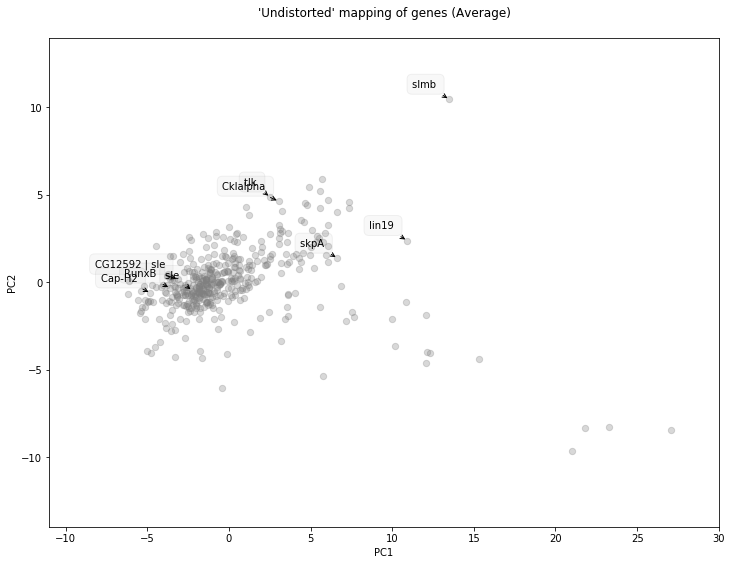

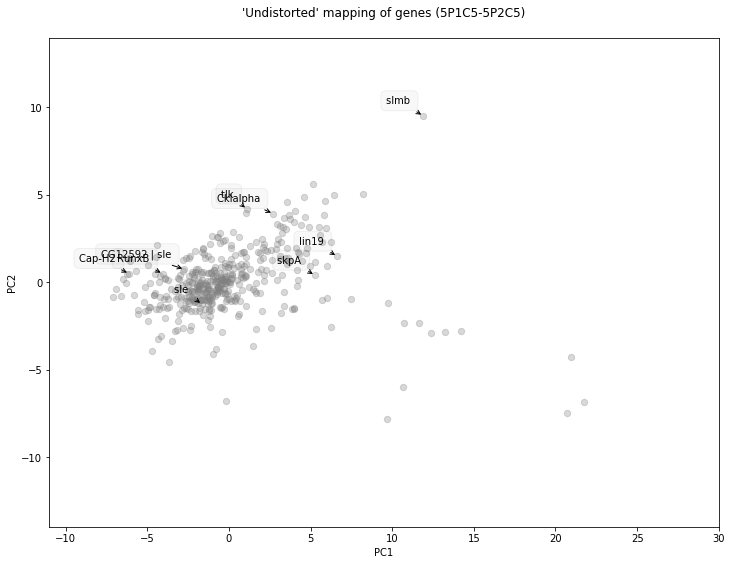

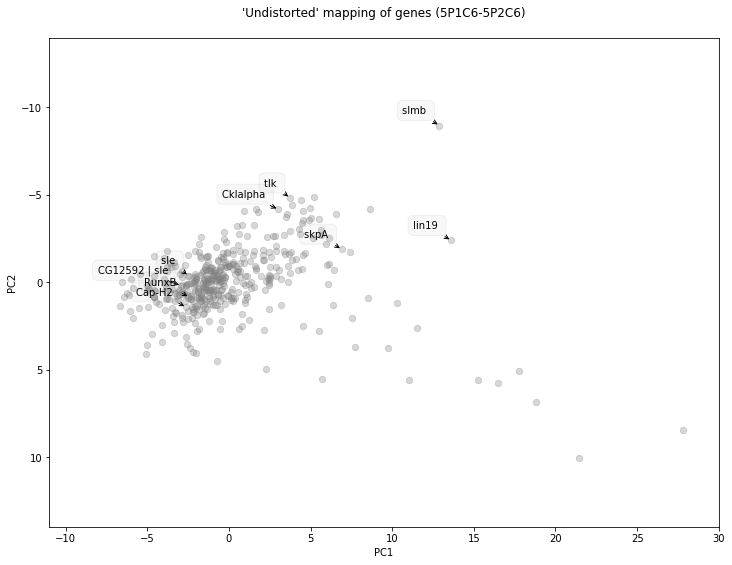

In [53]:
Interest=['slmb ','lin19 ','Cap-H2 ','skpA ','CkIalpha ','tlk ','RunxB ','CG12592 | sle ','sle ']
print('Notice: slmb and lin19 stand out, \nwhich gives low confidence to grope these two genes with any of the others.')
myPCAmap(c_pca,labellist=Interest,whichplate='Average')
myPCAmap(c_pca5,labellist=Interest,whichplate='5P1C5-5P2C5')
myPCAmap(c_pca6,labellist=Interest,whichplate='5P1C6-5P2C6',ylim=(14,-14))

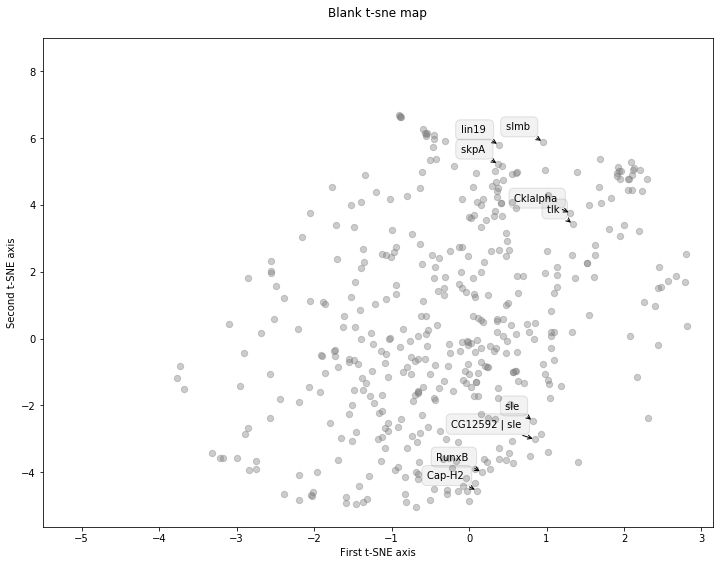

In [66]:
#Plotting blank t-sne map

plt.figure(figsize=(12,9))
plt.scatter(c_tsne_plot[:,0], c_tsne_plot[:,1], s=40, c= 'grey', alpha=0.4, label = str(i))   

df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(Interest)] 
for txt,x,y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
    plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.1),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.xlabel('First t-SNE axis')
plt.ylabel('Second t-SNE axis')
plt.xlim(-5.5,None)
plt.ylim(None,9)
plt.title('Blank t-sne map\n')
#plt.savefig('Blank t-sne map.pdf)
plt.show()
plt.close()

## Manually pick stable clusters

In [10]:
C10 = pd.read_csv('C10.csv')
C10 = C10[['Genes', 'spcl_laplacian','k-mean', 'ward_connection', 'spcl_nneighbors']]

what= C10.set_index('Genes')
clt1= what[(what['spcl_laplacian'] ==12) & (what['k-mean'] == 1)]
clt2= what[(what['spcl_laplacian']==4)]
clt7= what[(what['spcl_laplacian']==2)&(what['k-mean']==0)&(what['ward_connection']==0)]
clt4= what[(what['k-mean']==4)&(what['spcl_nneighbors']==10)]
clt5= what[(what['ward_connection']==9)&(what['spcl_nneighbors']==5)]
clt6= what[(what['spcl_laplacian']==6)&(what['k-mean']==3)&(what['ward_connection']==8)]
clt3= what[(what['spcl_laplacian']==18)&(what['ward_connection']==8)&(what['spcl_nneighbors']==18)]
print('Manually picked 7 clusters.\n')
for i,t in enumerate([clt1,clt2,clt3,clt4,clt5,clt6,clt7]):
    print('Picked cluster {} contains {} genes:\n{}\n\n'.format(i+1,t.shape[0], t.index.tolist()))
    #print(t)



Manually picked 7 clusters.

Picked cluster 1 contains 8 genes:
['scra _1', 'feo ', 'Klp61F', 'tsr ', 'pav ', 'pbl ', 'polo ', 'sti ']


Picked cluster 2 contains 4 genes:
['borr _1', 'CG7236 _1', 'ial ', 'borr _2']


Picked cluster 3 contains 14 genes:
['Lis-1', 'Spindly ', 'Nlp _1', 'Nc73EF _1', 'mars _1', 'Cam ', 'MCPH1', 'asp ', 'Ndc80', 'alphaTub67C', 'dmt ', 'Arp87C', 'betaTub56D', 'CG42550, CG14463']


Picked cluster 4 contains 18 genes:
['CG13482 _1', 'CG12592 | sle', 'ade5 _1', 'stwl ', 'chinmo ', 'bgm ', 'nAcRalpha-96Ab _1', 'CR42491', 'Gdh _2', 'CG34350 _2', 'v ', 'Sdic4, Sdic3, sw', 'CG8290 _2', 'CSN4', 'RunxB ', 'CG13742 _2', 'Cap-H2', 'rap _2']


Picked cluster 5 contains 11 genes:
['Not1', 'CG30007', 'Det _1', 'CG6015', 'betaTub85D', 'Rho1', 'SMC2', 'thr ', 'Det _2', 'scra _2', 'barr ']


Picked cluster 6 contains 10 genes:
['alphaTub84B', 'cal1 _1', 'skpA ', 'cdc16', 'ida ', 'shtd ', 'chb ', 'Hsc70Cb', 'Dhc64C', 'CG2469']


Picked cluster 7 contains 17 genes:
['RpS30', 

In [110]:
#eyeball cluster 1
print('Cluster 1:')
C10[(C10['spcl_laplacian'] ==12) & (C10['k-mean'] == 1)]

Cluster 1:


,Genes,spcl_laplacian,k-mean,ward_connection,spcl_nneighbors
36,scra _1,12,1,2,13
37,feo,12,1,2,13
87,Klp61F,12,1,2,13
200,tsr,12,1,2,13
255,pav,12,1,2,13
289,pbl,12,1,2,13
368,polo,12,1,2,13
372,sti,12,1,2,13


In [111]:
#eyeball cluster 2
print('Cluster 2:')
C10[(C10['spcl_laplacian']==4)]

Cluster 2:


,Genes,spcl_laplacian,k-mean,ward_connection,spcl_nneighbors
122,borr _1,4,7,14,13
179,CG7236 _1,4,7,6,13
335,ial,4,7,6,13
373,borr _2,4,7,6,13


In [112]:
#eyeball cluster 3
print('Cluster 3:')
C10[(C10['spcl_laplacian']==18)&(C10['ward_connection']==8)&(C10['spcl_nneighbors']==18)]

Cluster 3:


,Genes,spcl_laplacian,k-mean,ward_connection,spcl_nneighbors
19,Lis-1,18,14,8,18
28,Spindly,18,14,8,18
39,Nlp _1,18,3,8,18
77,Nc73EF _1,18,3,8,18
106,mars _1,18,3,8,18
107,Cam,18,3,8,18
216,MCPH1,18,3,8,18
228,asp,18,3,8,18
327,Ndc80,18,14,8,18
328,alphaTub67C,18,14,8,18


In [113]:
#eyeball cluster 4
print('Cluster 4:')
C10[(C10['k-mean']==4)&(C10['spcl_nneighbors']==10)]

Cluster 4:


,Genes,spcl_laplacian,k-mean,ward_connection,spcl_nneighbors
4,CG13482 _1,13,4,4,10
38,CG12592 | sle,13,4,4,10
74,ade5 _1,13,4,4,10
80,stwl,13,4,4,10
82,chinmo,13,4,4,10
93,bgm,13,4,4,10
177,nAcRalpha-96Ab _1,13,4,4,10
273,CR42491,13,4,4,10
277,Gdh _2,13,4,4,10
303,CG34350 _2,13,4,4,10


In [114]:
#eyeball cluster 5
print('Cluster 5:')
C10[(C10['ward_connection']==9)&(C10['spcl_nneighbors']==5)]

Cluster 5:


,Genes,spcl_laplacian,k-mean,ward_connection,spcl_nneighbors
26,Not1,19,2,9,5
30,CG30007,19,2,9,5
79,Det _1,19,13,9,5
95,CG6015,19,2,9,5
102,betaTub85D,19,13,9,5
191,Rho1,19,13,9,5
282,SMC2,19,2,9,5
291,thr,19,2,9,5
384,Det _2,19,13,9,5
385,scra _2,19,2,9,5


In [115]:
#eyeball cluster 6
print('Cluster 6:')
C10[(C10['spcl_laplacian']==6)&(C10['k-mean']==3)&(C10['ward_connection']==8)]

Cluster 6:


,Genes,spcl_laplacian,k-mean,ward_connection,spcl_nneighbors
20,alphaTub84B,6,3,8,18
72,cal1 _1,6,3,8,18
286,skpA,6,3,8,5
293,cdc16,6,3,8,5
294,ida,6,3,8,5
295,shtd,6,3,8,18
299,chb,6,3,8,5
354,Hsc70Cb,6,3,8,18
377,Dhc64C,6,3,8,18
406,CG2469,6,3,8,5


In [116]:
#eyeball cluster 7
print('Cluster 7:')
C10[(C10['spcl_laplacian']==2)&(C10['k-mean']==0)&(C10['ward_connection']==0)]
#C10[(C10['spcl_laplacian']==18) & (C10['k-mean']==3) & (C10['spcl_nneighbors']==18)]

Cluster 7:


,Genes,spcl_laplacian,k-mean,ward_connection,spcl_nneighbors
24,RpS30,2,0,0,7
31,RpL19,2,0,0,7
33,RpL4,2,0,0,14
35,RpS13,2,0,0,7
59,RpS7,2,0,0,7
60,Int6,2,0,0,7
66,RpL23,2,0,0,14
69,CG8636,2,0,0,7
105,RpS3A,2,0,0,2
129,Tango7,2,0,0,7


In [11]:
what['select'] = 0
#recycle=[]
for n,t in enumerate([clt1,clt2,clt3,clt4,clt5,clt6,clt7]):
    for x in t.index.tolist():
        what.loc[x]['select'] = n+1
#        recycle.append(1)
whatlabel= np.array(what['select'])
#sum(recycle)
#for i in range(7):
#    print(i, len(what[what['select'] == i]))

#Morelabel=['slmb ','lin19 ']
#df = c_pca_plot.loc[c_pca_plot['txt'].isin(Morelabel)]
#df

#C_tsne_plot['color'] = whatlabel
#print(C_tsne_plot.shape)
#clusters= np.unique(whatlabel)
#for i in clusters:
 #   df = C_tsne_plot[C_tsne_plot['color']== i]
#  print(i, len(df))

Notice: cluster 4 includes Cap-H2. slmb and lin19 stand out, 
which gives low confidence to grope these two genes with any of the others.


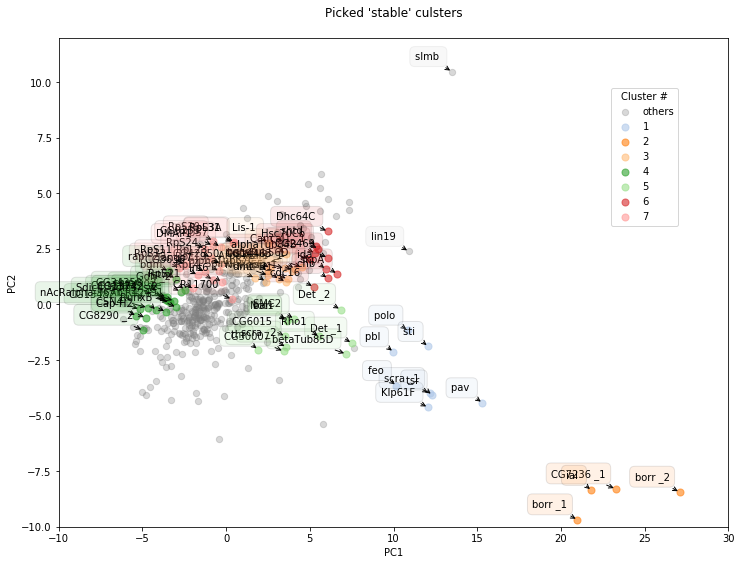

In [12]:
#Plotting PCA2D
print('Notice: cluster 4 includes Cap-H2. slmb and lin19 stand out, \nwhich gives low confidence to grope these two genes with any of the others.')
plt.figure(figsize=(12,9))
clusters= np.unique(whatlabel)
c_pca_plot=pd.DataFrame(c_pca[:,0:2],columns=('PC1','PC2'))
c_pca_plot['txt'] = Genes
c_pca_plot['color'] = whatlabel
cm = plt.cm.get_cmap('tab20')

recycle=[]
for i in [0]:
        df = c_pca_plot[c_pca_plot['color']== i]
        plt.scatter(df['PC1'], df['PC2'], s=40, c= 'grey', alpha=0.3, label='others')
        for txt in df['txt'].tolist():
            recycle.append(1)           

for i in clusters[1:]:
        df = c_pca_plot[c_pca_plot['color']== i]
        plt.scatter(df['PC1'], df['PC2'], s=50, c= cm.colors[i],alpha=0.6,label= str(i))
        for txt, x, y in zip(df['txt'].tolist(), df['PC1'].tolist(), df['PC2'].tolist()):
            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.1),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            recycle.append(1)

Morelabel=['slmb ','lin19 ']
df = c_pca_plot.loc[c_pca_plot['txt'].isin(Morelabel)]
for txt, x, y in zip(df['txt'].tolist(), df['PC1'].tolist(), df['PC2'].tolist()):
    plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.05),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))            

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(-10,12)
plt.xlim(-10,30)
plt.legend(title='Cluster #', loc=0, borderaxespad= 5, fontsize='medium')
plt.title('Picked \'stable\' culsters\n', fontsize='large')
#plt.savefig('PCA mapping.pdf')
plt.show()
plt.close()
#print('sum_recycle: {}'.format(sum(recycle)))

      

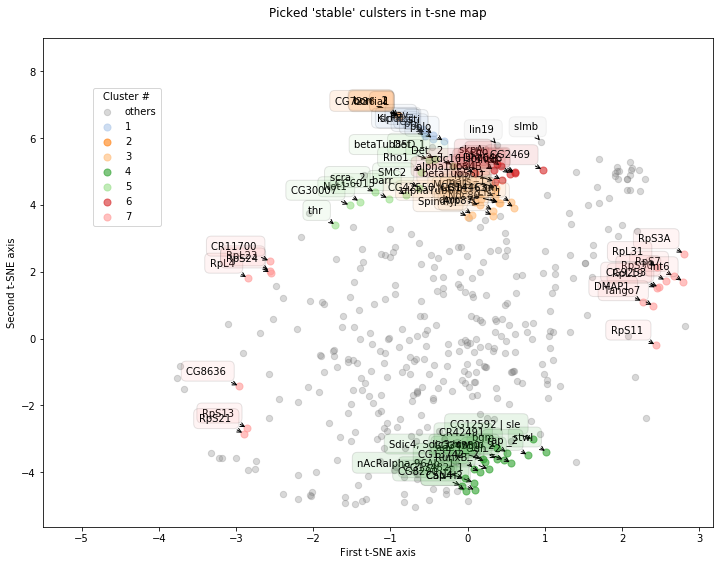

In [14]:
#Plotting picked clusters in t-sne map

recycle=[]
recyclelen=0

plt.figure(figsize=(12,9))
clusters= np.unique(whatlabel)
C_tsne_plot['color'] = whatlabel
cm = plt.cm.get_cmap('tab20')

for i in [0]:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        recyclelen += len(df)
        plt.scatter(df['TC1'], df['TC2'], s=40, c= 'grey', alpha=0.3, label='others')
        for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
            recycle.append(1)
#            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),textcoords='offset points', ha='right', va='bottom',
#            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.1),arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            

for i in clusters[1:]:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        plt.scatter(df['TC1'], df['TC2'], s=50, c= cm.colors[i],alpha=0.6,label = str(i))
        #print(df.head())
        recyclelen += len(df)
        for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.1),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            recycle.append(1)

Morelabel=['slmb ','lin19 ']
df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(Morelabel)]
for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
    plt.annotate(txt,xy=(x, y), xytext=(0, 10),
    textcoords='offset points', ha='right', va='bottom',
    bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.05),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))            

            
plt.xlabel('First t-SNE axis')
plt.ylabel('Second t-SNE axis')
plt.xlim(-5.5,None)
plt.ylim(None,9)
plt.legend(title='Cluster #', loc=0, borderaxespad= 5, fontsize='medium')
plt.title('Picked \'stable\' culsters in t-sne map\n')
#plt.savefig('Blank t-sne map.pdf)
plt.show()
plt.close()
#print('sum_recycle: {}, recyclelen: {}'.format(sum(recycle),recyclelen))
#print('time: {0:.5f}s\n'.format(elapsed_time))

## k-mean

In [16]:
#k-mean
#http://scikit-learn.org/stable/modules/generated /sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
n_labels= 15
kmeans = KMeans(n_clusters=n_labels, random_state=0).fit(c_pca)
kmeans5 = KMeans(n_clusters=n_labels, random_state=0).fit(c_pca5)
kmeans6 = KMeans(n_clusters=n_labels, random_state=0).fit(c_pca6)

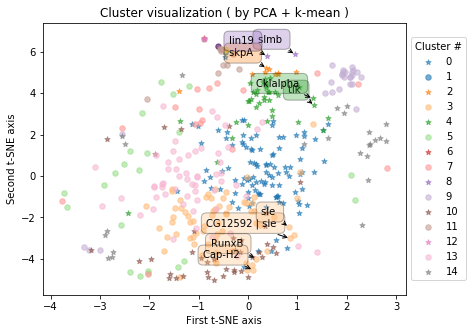

In [64]:
myVisualizer(kmeans6.labels_, 'PCA + k-mean', Interest)
#myVisualizer(kmeans5.labels_, 'PCA + k-mean')
#myVisualizer(kmeans6.labels_, 'PCA + k-mean')

In [119]:
#show labels
#print(len(Genes),Genes[40],Genes[388])
#Genes
#myNameVisual(kmeans.labels_, 'PCA + k-mean');

## AgglomerativeClustering - ward

Ward with connectivity time: 0.22587s
 


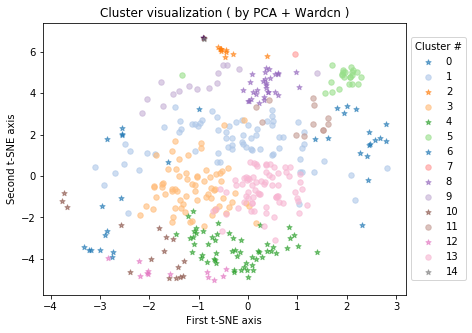

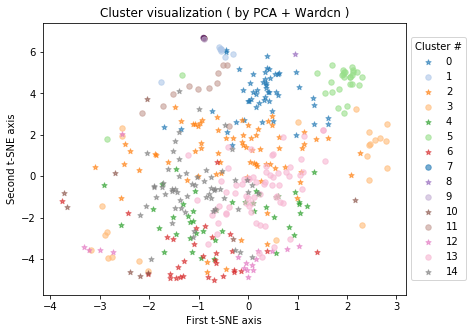

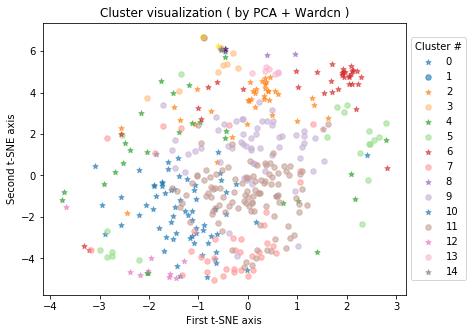

In [19]:
#http://scikit-learn.org/0.15/modules/generated/sklearn.cluster.Ward.html
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
n_labels= 15

'''linkage : {“ward”, “complete”, “average”}'''
# with connectivity constraints
st = time.time()
connectivity = kneighbors_graph(c_pca, n_neighbors=20, include_self=False)
wardcn = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity, linkage='ward').fit(c_pca)

connectivity5 = kneighbors_graph(c_pca5, n_neighbors=20, include_self=False)
connectivity6 = kneighbors_graph(c_pca6, n_neighbors=20, include_self=False)
wardcn5 = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity5, linkage='ward').fit(c_pca5)
wardcn6 = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity6, linkage='ward').fit(c_pca6)

elapsed_time = time.time() - st
print('Ward with connectivity time: {0:.5f}s\n '.format(elapsed_time))

myVisualizer(wardcn.labels_, 'PCA + Wardcn')
myVisualizer(wardcn5.labels_, 'PCA + Wardcn')
myVisualizer(wardcn6.labels_, 'PCA + Wardcn')

## SpectralClustering

spcl_nneighbors time: 0.20100s
 


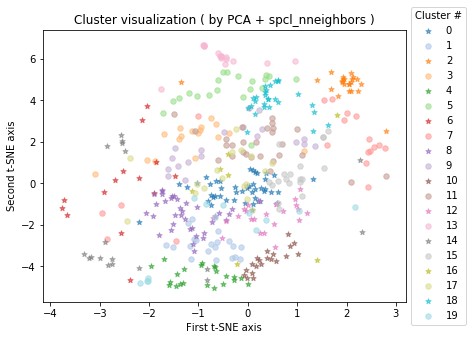

spcl_laplacian time: 0.13590s
 


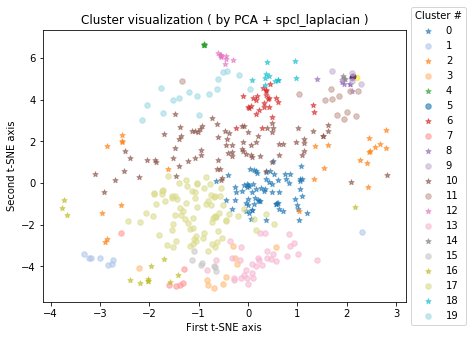

In [20]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
from sklearn.cluster import SpectralClustering
n_labels= 20

'''SpectralClustering(n_clusters=8, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, 
affinity=’rbf’, n_neighbors=10, eigen_tol=0.0, assign_labels=’kmeans’, degree=3, coef0=1, 
kernel_params=None, n_jobs=-1)

affinity='laplacian',‘nearest_neighbors’, ‘rbf’
'''

#spcl_nneighbors
st = time.time()
spcl_nneighbors = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(c_pca)

spcl_nneighbors5 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(c_pca5)
spcl_nneighbors6 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(c_pca6)


elapsed_time = time.time() - st
print('spcl_nneighbors time: {0:.5f}s\n '.format(elapsed_time))
myVisualizer(spcl_nneighbors.labels_, 'PCA + spcl_nneighbors')

#spcl_laplacian
st = time.time()
spcl_laplacian = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(c_pca)

spcl_laplacian5 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(c_pca5)
spcl_laplacian6 = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(c_pca6)

elapsed_time = time.time() - st
print('spcl_laplacian time: {0:.5f}s\n '.format(elapsed_time))
myVisualizer(spcl_laplacian.labels_, 'PCA + spcl_laplacian')

## Brich

Birch time: 0.11679s



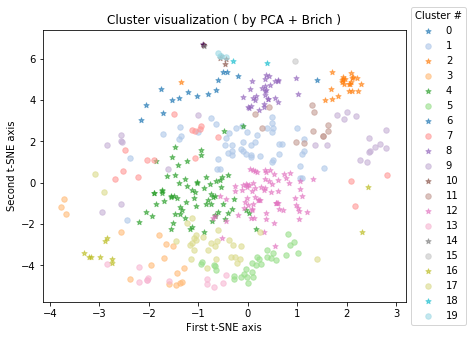

In [21]:
#hhttp://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html
from sklearn.cluster import Birch
st = time.time()

n_labels= 20
brich = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(c_pca)
#len(brich.labels_)

brich5 = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(c_pca5)
brich6 = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(c_pca6)

elapsed_time = time.time() - st
print('Birch time: {0:.5f}s\n'.format(elapsed_time))
myVisualizer(brich.labels_, 'PCA + Brich')

## Collective Plotting

In [22]:
# collect arguments
Labels = [kmeans.labels_,wardcn.labels_,spcl_nneighbors.labels_,
          spcl_laplacian.labels_,brich.labels_]
Labels5 = [kmeans5.labels_,wardcn5.labels_,spcl_nneighbors5.labels_,
          spcl_laplacian5.labels_,brich5.labels_]
Labels6 = [kmeans6.labels_,wardcn6.labels_,spcl_nneighbors6.labels_,
          spcl_laplacian6.labels_,brich6.labels_]
labelnames = ['k-mean','ward_connection','spcl_nneighbors','spcl_laplacian','birch']

In [38]:
# create a 5x3 grid of subplots
st = time.time()

fig,((Ax0,ax0,ay0),(Ax1,ax1,ay1),(Ax2,ax2,ay2),(Ax3,ax3,ay3),(Ax4,ax4,ay4)) = plt.subplots(5,3,figsize=(30,40),
                                                                                           sharex=True, sharey=True)
fig.suptitle('Checking the clustering consistency across 5P*C5, 5P*C6 and the Average', fontsize=40) #set main title
plt.subplots_adjust(wspace=0.3) #set space between subplots

Axs = [Ax0,Ax1,Ax2,Ax3,Ax4]
axs5 = [ax0,ax1,ax2,ax3,ax4]
axs6 = [ay0,ay1,ay2,ay3,ay4]

Interest=['slmb ','lin19 ','Cap-H2 ','skpA ','CkIalpha ','tlk ','RunxB ','CG12592 | sle ','sle ']

def subVisualizer(whichsub,colorlabel,whichplate,labelname='unknown label',labellist = Interest):
    C_tsne_plot['color'] = colorlabel
    clusters= np.unique(colorlabel)
    mk=['*','o']
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        whichsub.scatter(df['TC1'], df['TC2'], s=30, c= cm.colors[i], marker= mk[i%2], alpha=0.4, label = str(i))
        whichsub.set_title('{} through PCA clustered by {}'.format(whichplate, labelname))
        whichsub.legend(title='Cluster #',loc=3, bbox_to_anchor= (1,0), ncol=1, fontsize='medium',frameon=False)
    
    df = C_tsne_plot.loc[C_tsne_plot['txt'].isin(labellist)] 
    for txt,x,y,i in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist(), df['color'].tolist()):
        whichsub.annotate(txt,xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))    
    return

for n in range(5):
    subVisualizer(Axs[n],Labels[n],'Average',labelnames[n])
    subVisualizer(axs5[n],Labels5[n],'5P1C5-5P2C5',labelnames[n])
    subVisualizer(axs6[n],Labels6[n],'5P1C6-5P2C6',labelnames[n])

plt.savefig("NewSummary.pdf")
plt.close()

elapsed_time = time.time() - st
print('Plotting time: {0:.5f}s\nCheck file NewSummary.pdf'.format(elapsed_time))    

#necessary on some systems to update the plot
#plt.gcf().canvas.draw()

Plotting time: 4.51602s
Check file NewSummary.pdf


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')